# Eigenenergies of Josephson junction in Hamiltonian 

Hamiltonian of the system: 

\begin{equation*} 
  H = \sum 4E_c(n_g-n)^2 \; | n \rangle \langle n | \;  - \frac{E_j}{2}\sum (\; | n \rangle \langle n+1 | \;)  + \; | n+1 \rangle \langle n | \;  ) 
\label{eq:Hamiltonian1} \tag{1}
\end{equation*}


In [1]:
%matplotlib inline
import qutip as qt
from qutip import *
from pylab import *
from scipy import *
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import string
import time

In [2]:
import heq
# Parameters
Ec = 1
level = 4
Nc = 10
Ej = np.array([0.1, 1.0, 5.0, 10.0])
ng = np.arange(-2, 2, 0.01)

# Operators
N = qt.charge(Nc)  # charge operator
Ic = qt.qeye(2*Nc+1)  # Identity operator
T = qt.tunneling(2*Nc+1)  # tunneling operator

Calculating Ej/Ec = 0.1 ... done.
Calculating Ej/Ec = 1.0 ... done.
Calculating Ej/Ec = 5.0 ... done.
Calculating Ej/Ec = 10.0 ... done.
Elapsed time: 16.31 seconds


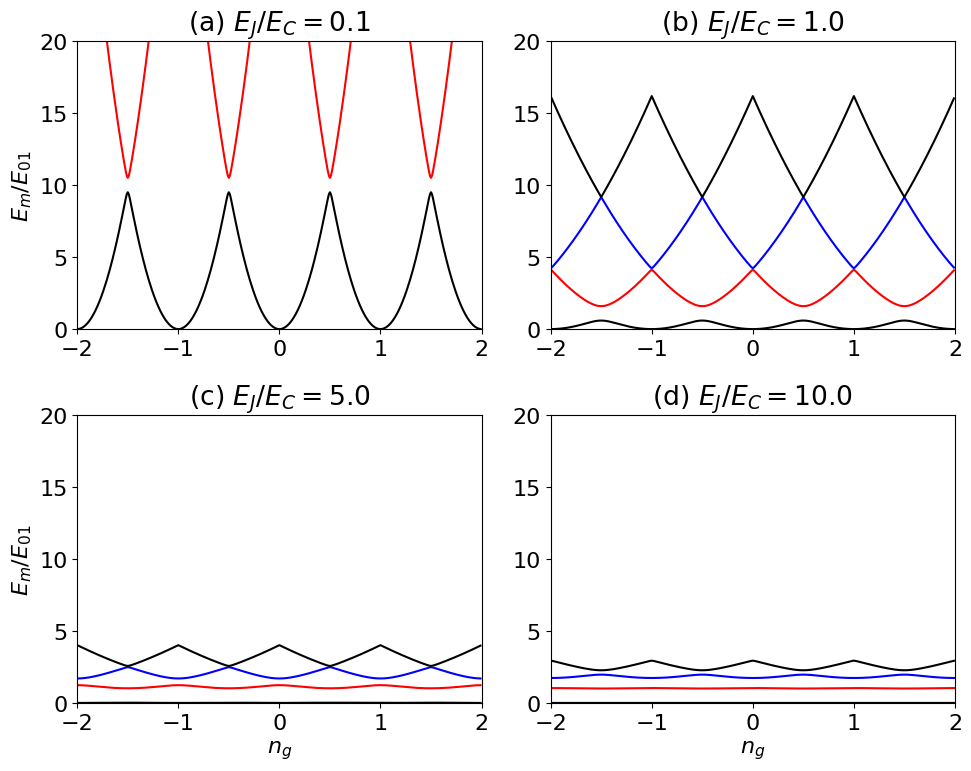

In [3]:
plt.rc('font', size=16)
plt.rc('axes', prop_cycle=(cycler(color='krb')))
ylims = [[-0.5, 10], [-0.1, 3], [-0.1, 2.5], [-0.1, 2.5]]
plt.figure(figsize=(10, 8))

tstart = time.time()
for ii in range(0, len(Ej)):
    print('Calculating Ej/Ec = {:.1f} ... '.format(Ej[ii]/Ec), end='')
    E = np.array(qt.parallel_map(heq.Hamil, ng, task_args=(Ej[ii],)))
    E = E - np.min(E[:, 0])
    E = E/(np.min(E[:, 1] - E[:, 0]))
    plt.subplot(2, 2, ii+1)
    plt.plot(ng, E)
    plt.title('({}) $E_J/E_C={:.1f}$'.format(string.ascii_letters[ii], Ej[ii]))
    if ii > 1:
        plt.xlabel('$n_g$')
    if ii % 2 == 0:
        plt.ylabel('$E_m/E_{01}$')
    plt.xlim([-2, 2])
    plt.ylim([0,20])
    print('done.')
print('Elapsed time: {:.2f} seconds'.format(time.time() - tstart))
plt.tight_layout()
plt.savefig('eigen value.png')
plt.show()

Eigenenergies $E_m$ (for first 2 levels m =1, 2) of the qubit Hamiltonian as a function effective offset charge $n_g$ for different ratios $\frac{Ej}{Ec}$. Energies are given in units of the transition energy $E_{01}$ , evaluated at the degeneracy point $n_g = \frac{1}{2}$. The zero point of energy is chosen as the bottom of the m = 0 level. 